<a href="https://colab.research.google.com/github/Samyakjain03112001/Superstore-biz-case/blob/main/Superstore_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Superstore Business case - Walmart**

**Problem statement**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior against the customer’s gender and the various other factors to help the business make better decisions. We will help to understand the spending habits between male and female customers by using various test hypothesis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm,binom,geom,t,ttest_ind,ttest_1samp,ttest_rel,chi
from scipy.stats import f, f_oneway
from scipy.stats import poisson

In [3]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094") #Loading data set

In [4]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#**Checking Shape, data type, null value count.**

In [5]:
df.shape

(550068, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


Marital_Status has integer value

Lets change the Marital_Status columns values into "Married" and "Unmarried"

In [9]:
df["Marital_Status"]=df["Marital_Status"].replace([0,1],["Unmarried","Married"])
df.head(7)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969
5,1000003,P00193542,M,26-35,15,A,3,Unmarried,1,15227
6,1000004,P00184942,M,46-50,7,B,2,Married,1,19215


#**Non-Graphical analysis**

In [11]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [12]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [13]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [14]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [15]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [16]:
df["Marital_Status"].value_counts()

Unmarried    324731
Married      225337
Name: Marital_Status, dtype: int64

In [17]:
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

#**Insights on non-graphical analysis**

Most of the people in this data are Male, Unmarried

Majority of people are from "26-35" age group which represent the youth

Most frequent purchased product category are of 5, 1, and 8

People stay in the city mostly for one or two years

#**Checking null values and duplicates**

In [18]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [19]:
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


#**Visual Analysis Univariate and Bivariate**

<Axes: xlabel='Gender', ylabel='Purchase'>

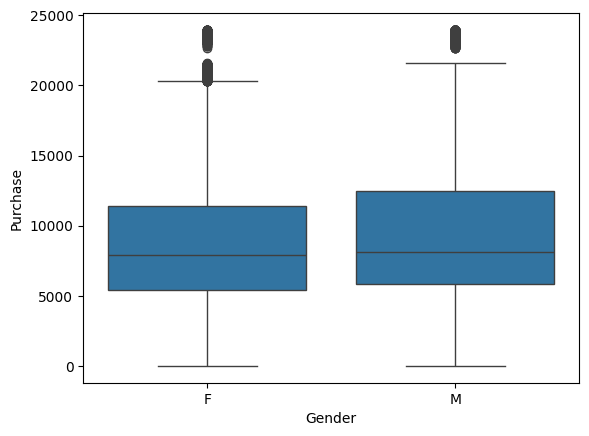

In [20]:
sns.boxplot(data=df,x="Gender",y="Purchase")

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

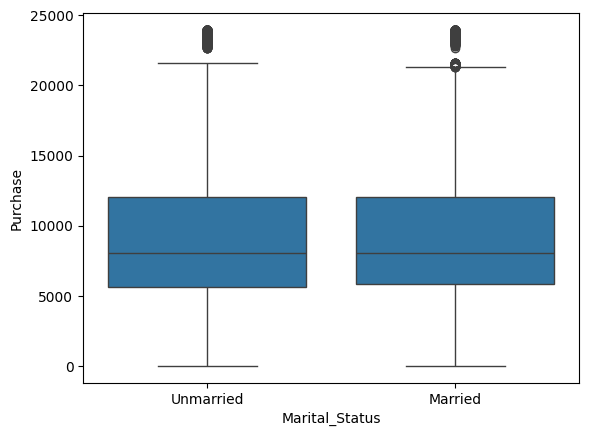

In [22]:
sns.boxplot(data=df,x="Marital_Status",y="Purchase")

**Medians of the box plot are nearly same for purchase vs Gender and purchase vs Marital status**

<Axes: xlabel='City_Category', ylabel='Purchase'>

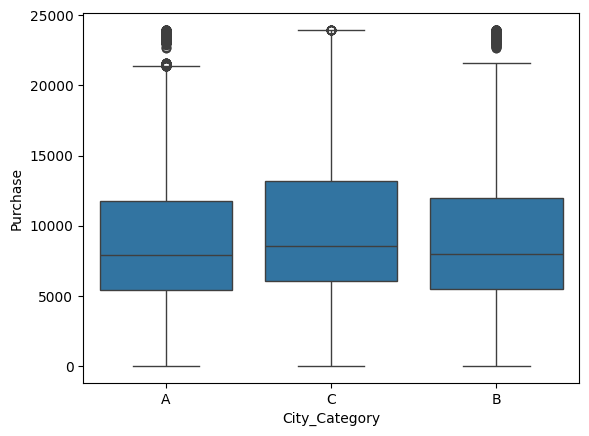

In [23]:
sns.boxplot(data=df,x="City_Category",y="Purchase")

<Axes: xlabel='Purchase', ylabel='Density'>

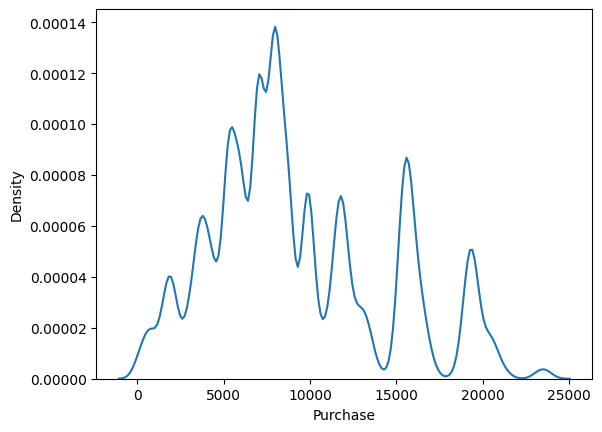

In [24]:
sns.kdeplot(data=df,x="Purchase")

Purchase pattern does not follow normal distribution

<Axes: xlabel='Purchase', ylabel='Density'>

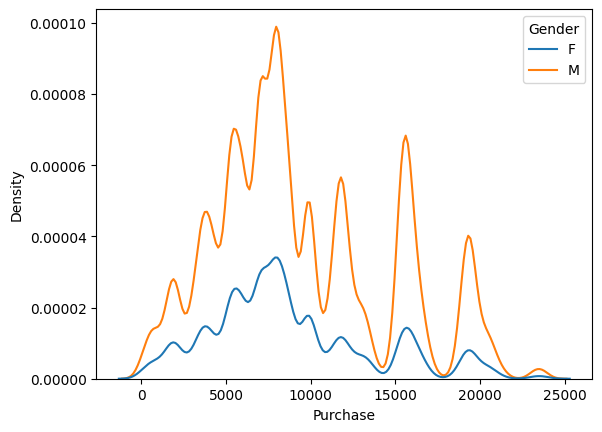

In [25]:
sns.kdeplot(data=df,x="Purchase",hue="Gender")

<Axes: xlabel='Purchase', ylabel='Density'>

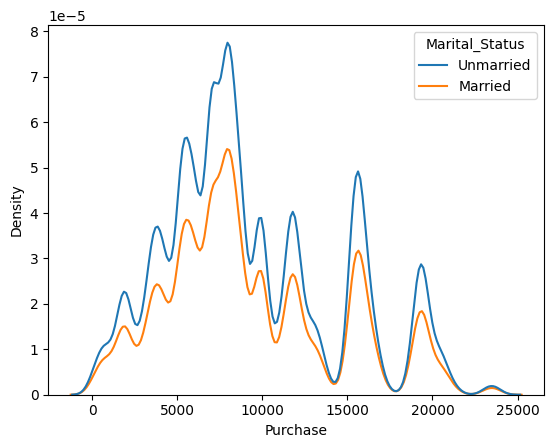

In [26]:
sns.kdeplot(data=df,x="Purchase",hue="Marital_Status")

<Axes: xlabel='Age', ylabel='count'>

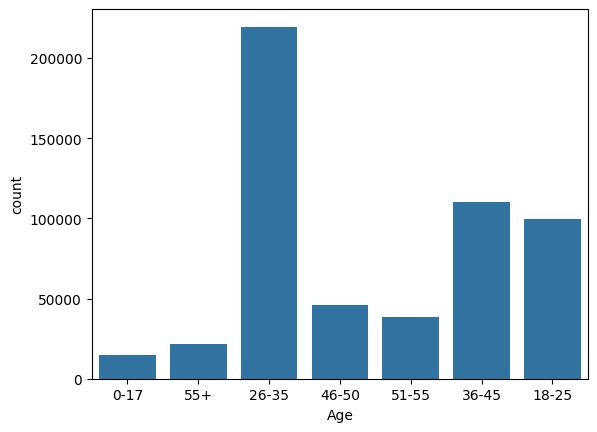

In [27]:
sns.countplot(data=df,x="Age")

<Axes: xlabel='Product_Category', ylabel='count'>

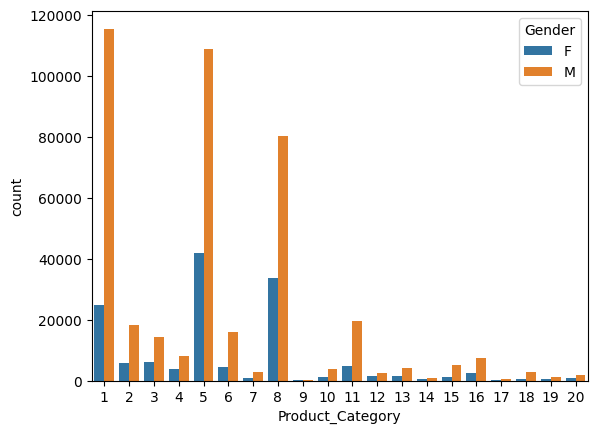

In [28]:
sns.countplot(data=df,x="Product_Category",hue="Gender")

Nearly in all product category Male has highest purchase rate, and product 1, 5, and 8 are frequently bought by customers.

<Axes: xlabel='City_Category', ylabel='Purchase'>

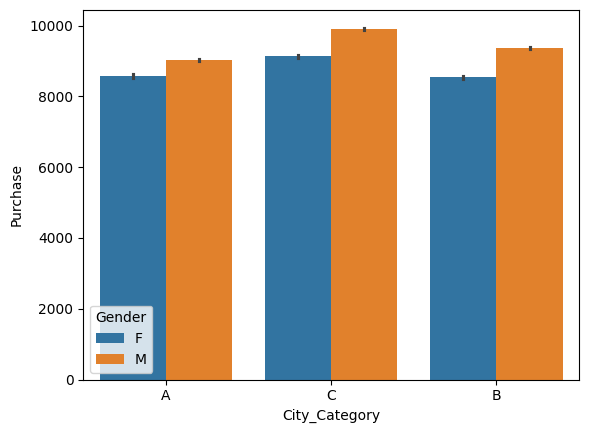

In [29]:
sns.barplot(data=df,x="City_Category",y="Purchase",hue="Gender")

<Axes: xlabel='Age', ylabel='Purchase'>

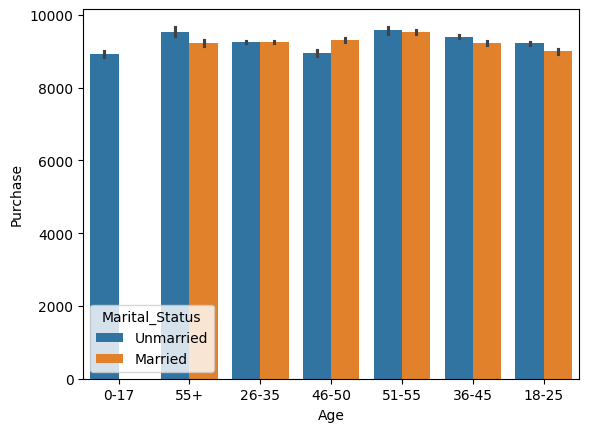

In [30]:
sns.barplot(data=df,x="Age",y="Purchase",hue="Marital_Status")

<Axes: xlabel='Age', ylabel='Purchase'>

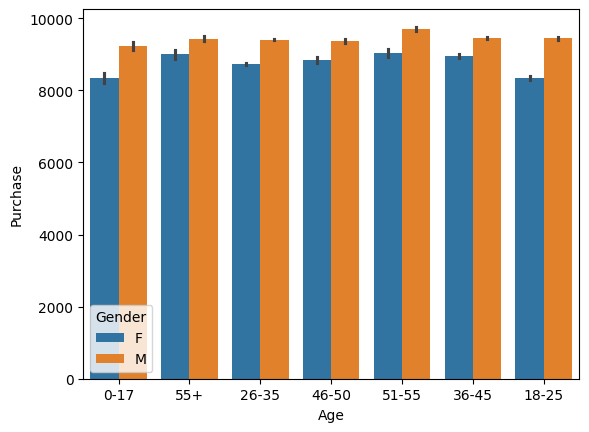

In [31]:
sns.barplot(data=df,x="Age",y="Purchase",hue="Gender")

Nearly in all age group male has more purchashing count than female.

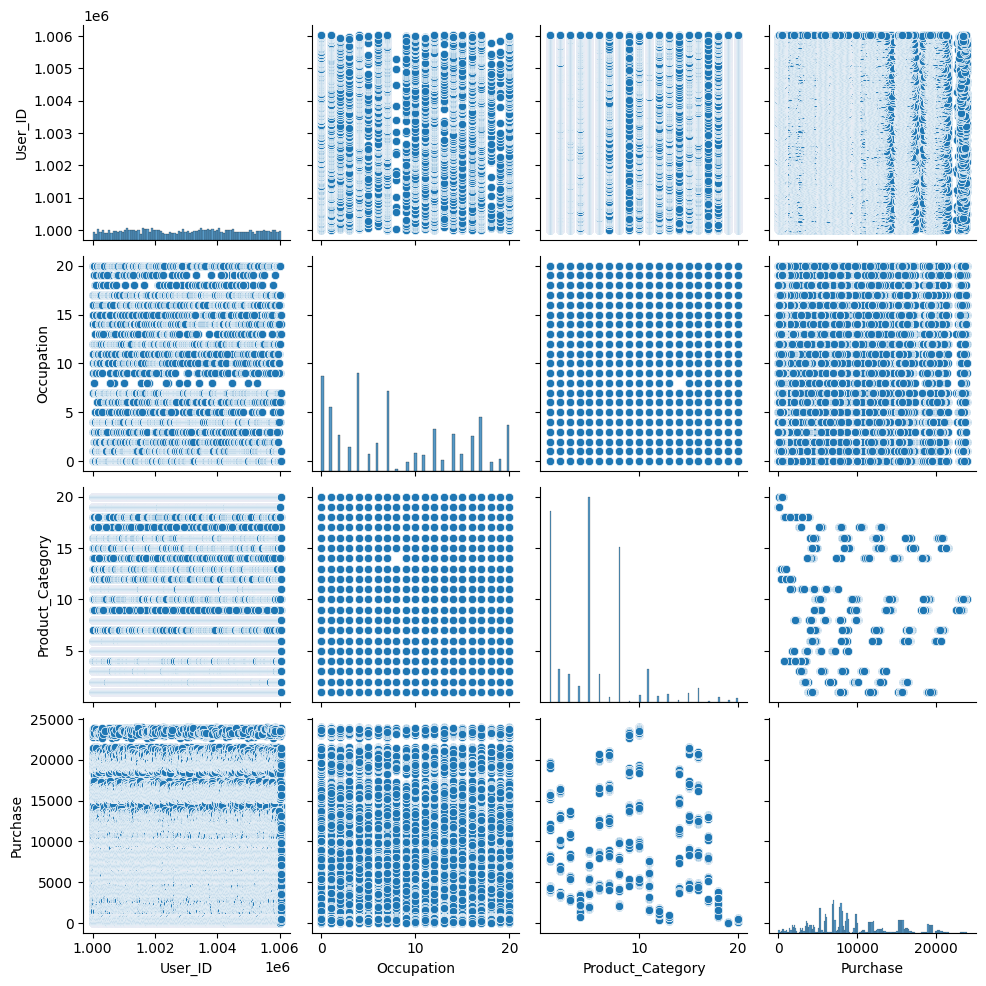

In [32]:
sns.pairplot(data=df)

#**As Purchase Kde plot does not follow gaussian distribution we will take CLT of purchase**

**Purchase Vs Gender**

For 100 sample

In [33]:
female=pd.Series(df.loc[df["Gender"]=="F"]["Purchase"])
male=pd.Series(df.loc[df["Gender"]=="M"]["Purchase"])

<Axes: ylabel='Count'>

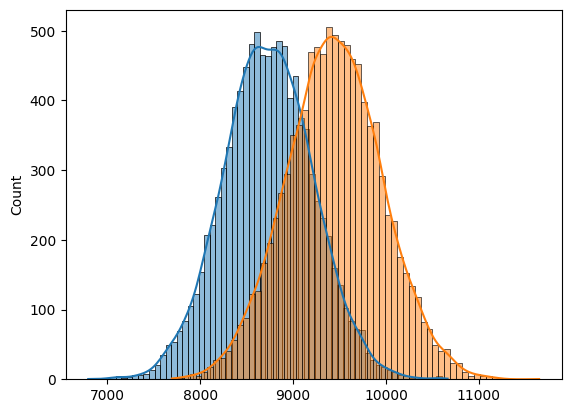

In [34]:
female_clt=[]
fem_samp_100=np.random.choice(female,size=100)
for i in range(10000):
    female_clt.append(np.mean(np.random.choice(female,size=100)))
male_clt=[]
m_samp_100=np.random.choice(male,size=100)
for i in range(10000):
    male_clt.append(np.mean(np.random.choice(male,size=100)))
sns.histplot(female_clt,kde=True)
sns.histplot(male_clt,kde=True)

In [35]:
print("Confidence Interval by taking 100 customer at 95%")
print("female: ", norm.interval(0.95,loc=np.mean(fem_samp_100),scale=np.std(fem_samp_100)/(np.sqrt(100))))
print("male: ", norm.interval(0.95,loc=np.mean(m_samp_100),scale=np.std(m_samp_100)/(np.sqrt(100))))

Confidence Interval by taking 100 customer at 95%
female:  (7767.2022737648595, 9310.257726235139)
male:  (8086.942596544205, 10073.137403455796)


for 100 sample means the purchases of male and female are overlapping

For 500 sample

<Axes: ylabel='Count'>

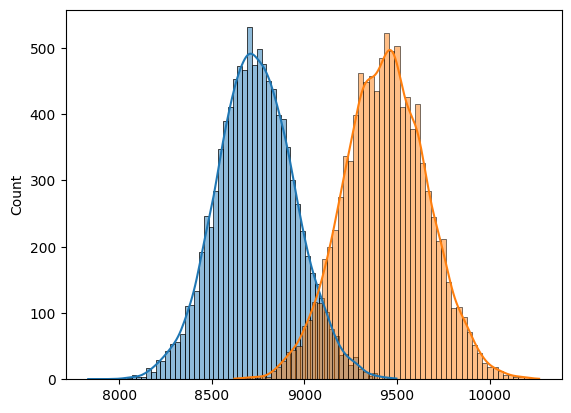

In [36]:
female_clt1=[]
fem_samp_500=np.random.choice(female,size=500)
for i in range(10000):
    female_clt1.append(np.mean(np.random.choice(female,size=500)))
male_clt1=[]
m_samp_500=np.random.choice(female,size=500)
for i in range(10000):
    male_clt1.append(np.mean(np.random.choice(male,size=500)))
sns.histplot(female_clt1,kde=True)
sns.histplot(male_clt1,kde=True)

In [37]:
print("Confidence Interval by taking 500 customer at 95%")
print("female: ", norm.interval(0.95,loc=np.mean(fem_samp_500),scale=np.std(fem_samp_100)/(np.sqrt(500))))
print("male: ", norm.interval(0.95,loc=np.mean(m_samp_500),scale=np.std(m_samp_100)/(np.sqrt(500))))

Confidence Interval by taking 500 customer at 95%
female:  (8768.510311522477, 9458.585688477524)
male:  (8289.037339518862, 9177.29066048114)


for 500 sample means the purchases of male and female are overlapping

For 1000 sample

<Axes: ylabel='Count'>

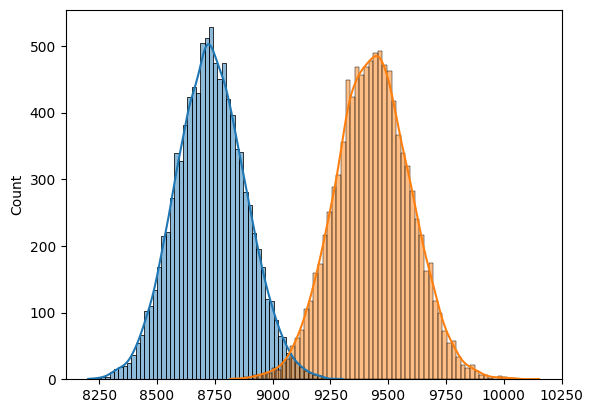

In [38]:
female_clt2=[]
fem_samp_1000=np.random.choice(female,size=1000)
for i in range(10000):
    female_clt2.append(np.mean(np.random.choice(female,size=1000)))
male_clt2=[]
m_samp_1000=np.random.choice(male,size=1000)
for i in range(10000):
    male_clt2.append(np.mean(np.random.choice(male,size=1000)))
sns.histplot(female_clt2,kde=True)
sns.histplot(male_clt2,kde=True)

In [39]:
print("Confidence Interval by taking 1000 customer at 95%")
print("female: ", norm.interval(0.95,loc=np.mean(fem_samp_1000),scale=np.std(fem_samp_1000)/(np.sqrt(1000))))
print("male: ", norm.interval(0.95,loc=np.mean(m_samp_1000),scale=np.std(m_samp_1000)/(np.sqrt(1000))))

Confidence Interval by taking 1000 customer at 95%
female:  (8687.117661349095, 9298.070338650903)
male:  (8890.852845350759, 9514.58915464924)


In [40]:
print("Confidence Interval by taking 1000 customer at 99%")
print("female: ", norm.interval(0.99,loc=np.mean(fem_samp_1000),scale=np.std(fem_samp_1000)/(np.sqrt(1000))))
print("male: ", norm.interval(0.99,loc=np.mean(m_samp_1000),scale=np.std(m_samp_1000)/(np.sqrt(1000))))

Confidence Interval by taking 1000 customer at 99%
female:  (8591.130039006615, 9394.057960993383)
male:  (8792.856768858146, 9612.585231141853)


for 1000 sample the confidence interval of female is (8384.924851716494, 9156.131148283506) and for male is (9249.348879883803, 10103.041120116197) at 99%

By T test

In [41]:
H0="There is no difference in average purchasing range of male and female"
Ha="Female has less average purchasing range than male"
Alpha=0.01
T_stat,p_val=ttest_ind(fem_samp_1000,m_samp_1000,alternative="less")
print("t statistics: ", T_stat,"p value: ", p_val)
if p_val>Alpha:
    print(H0)
else:
    print(Ha)

t statistics:  -0.9429243207810052 p value:  0.1729168061491333
There is no difference in average purchasing range of male and female


**Purchase Vs Marital_Status**

In [42]:
married=pd.Series(df.loc[df["Marital_Status"]=="Married"]["Purchase"])
unmarried=pd.Series(df.loc[df["Marital_Status"]=="Unmarried"]["Purchase"])

In [43]:
np.mean(married)

9261.174574082374

In [44]:
np.mean(unmarried)

9265.907618921507

For 100 sample

<Axes: ylabel='Count'>

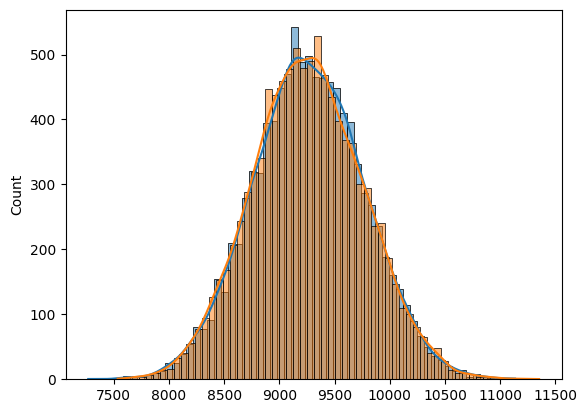

In [45]:
unmar_clt=[]
unmar_samp_100=np.random.choice(unmarried,size=100)
for i in range(10000):
    unmar_clt.append(np.mean(np.random.choice(unmarried,size=100)))
mar_clt=[]
unmar_samp_100=np.random.choice(married,size=100)
for i in range(10000):
    mar_clt.append(np.mean(np.random.choice(married,size=100)))
sns.histplot(unmar_clt,kde=True)
sns.histplot(mar_clt,kde=True)

<Axes: ylabel='Count'>

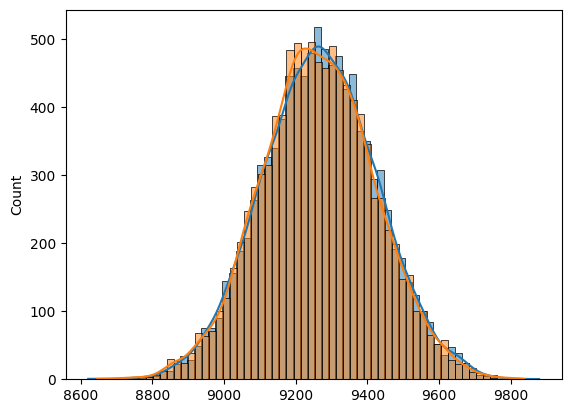

In [46]:
unmar_clt=[]
unmar_samp_1000=np.random.choice(unmarried,size=1000)
for i in range(10000):
    unmar_clt.append(np.mean(np.random.choice(unmarried,size=1000)))
mar_clt=[]
unmar_samp_1000=np.random.choice(married,size=1000)
for i in range(10000):
    mar_clt.append(np.mean(np.random.choice(married,size=1000)))
sns.histplot(unmar_clt,kde=True)
sns.histplot(mar_clt,kde=True)

As seen in the above graph the average purchase means of Married and Unmarried are strongly overlapping even after taking 1000 samples.

#**Business Insights**

Most of the people in this data are Male, Unmarried

Majority of people are from "26-35" age group which represent the youth

Most frequent purchased product category are of 5, 1, and 8

People stay in the city mostly for one or two years

Nearly in all age group male has more purchashing count than female.

Males average purchasing pattern (9249.35, 10103.04) is greater than females average purchasing pattern (8384.92, 9156.13) at 99% confidence interval.

#**Business Recommendations**

Most of the sales are from "26-35" age group, Walmart can focus on giving offers to other age groups.

As majority of the purchases was done by males, Walmart can focus on statergies to attract female customer

Purchasing power of males is higher compare to females concluded from confidence interval, Walmart can increase the price of most frequenlty purchased product such as product category 1, 5, and 8